# Nifty50 Closing Price Prediction using ML

* Model: Stacked LSTM
* Dataset: Nifty50 from Yahoo Fianance

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This code imports the necessary Python libraries for data analysis and visualization: Pandas, NumPy, and Matplotlib. Here's what each line does:

import pandas as pd: This imports the Pandas library, which is used for data manipulation and analysis. The library is given an alias pd to make it easier to refer to it in the code.
import numpy as np: This imports the NumPy library, which is used for numerical operations and array manipulation. The library is given an alias np to make it easier to refer to it in the code.
import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library, which is used for data visualization. The module is given an alias plt to make it easier to refer to it in the code.

In [2]:
df = pd.read_csv('./dataset/NIFTY50.csv')
df.index = pd.to_datetime(df['Date']).dt.date

df.drop(['Date', 'Adj Close'], axis='columns', inplace=True)
display(df.head())
display(df.tail())

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


,Open,High,Low,Close
Date,,,,
2021-04-26,14449.45020,14557.50000,14421.29981,14485.00000
2021-04-27,14493.79981,14667.54981,14484.84961,14653.04981
2021-04-28,14710.50000,14890.25000,14694.95020,14864.54981
2021-04-29,14979.00000,15044.34961,14814.45020,14894.90039
2021-04-30,14747.34961,14855.45020,14601.70020,14631.09961


This code reads in a CSV file containing historical data for the NIFTY50 stock market index and creates a Pandas DataFrame with the data. Here's what each line does:

df = pd.read_csv('./dataset/NIFTY50.csv'): This uses the Pandas read_csv() function to read in the CSV file located in the ./dataset directory and creates a DataFrame called df to store the data.
df.index = pd.to_datetime(df['Date']).dt.date: This converts the "Date" column of the DataFrame into a DatetimeIndex object using the pd.to_datetime() function, and sets it as the index of the DataFrame. The .dt.date attribute is used to extract the date component of the timestamps.
df.drop(['Date', 'Adj Close'], axis='columns', inplace=True): This drops the "Date" and "Adj Close" columns from the DataFrame using the drop() method with the axis='columns' parameter. The inplace=True parameter is used to modify the DataFrame in place rather than returning a new DataFrame.
display(df.head()): This displays the first 5 rows of the DataFrame using the head() method.
display(df.tail()): This displays the last 5 rows of the DataFrame using the tail() method.

In [3]:
print(f'Dataset Shape: {df.shape}\n')
display(df.info())

Dataset Shape: (3326, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 2007-09-17 to 2021-04-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3326 non-null   float64
 1   High    3326 non-null   float64
 2   Low     3326 non-null   float64
 3   Close   3326 non-null   float64
dtypes: float64(4)
memory usage: 129.9+ KB


None

This code prints information about the df DataFrame, including its shape and column data types, using the shape and info() methods. Here's what each line does:

print(f'Dataset Shape: {df.shape}\n'): This prints a formatted string to the console that displays the number of rows and columns in the DataFrame.
display(df.info()): This displays a summary of the DataFrame's columns, including the column names, non-null values, and data types, using the info() method. The display() function is used to render the summary nicely in Jupyter notebooks.

In [4]:
window_len = 5
feature = 'Open'

These two lines of code define variables that will be used later in the code. Here's what each line does:

window_len = 5: This sets the value of the window_len variable to 5. This variable will be used to define the size of the rolling window that will be used to generate technical indicators.
feature = 'Open': This sets the value of the feature variable to 'Open'. This variable will be used to specify which column of the DataFrame to use as the feature for the machine learning model.

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

This code uses the train_test_split() function from the scikit-learn library to split the df DataFrame into training and testing sets for use in a machine learning model. Here's what each line does:

from sklearn.model_selection import train_test_split: This imports the train_test_split() function from the scikit-learn library. This function is used to split a dataset into training and testing sets.

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False): This splits the df DataFrame into training and testing sets using the train_test_split() function. The test_size parameter is set to 0.2, which means that 20% of the data will be used for testing and 80% will be used for training. The shuffle parameter is set to False, which means that the data will not be shuffled before splitting. The resulting training and testing sets are assigned to the df_train and df_test variables, respectively.

In [6]:
df_train.head()

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


This code displays the first 5 rows of the df_train DataFrame using the head() method. Here's what this line does:

df_train.head(): This displays the first 5 rows of the df_train DataFrame using the head() method. This method returns a new DataFrame containing the first n rows of the original DataFrame, where n is the number specified as the argument (5 by default).

In [7]:
df_test.head()

,Open,High,Low,Close
Date,,,,
2018-08-07,11423.15039,11428.95020,11359.70020,11389.4502
2018-08-08,11412.50000,11459.95020,11379.29981,11450.0000
2018-08-09,11493.25000,11495.20020,11454.09961,11470.7002
2018-08-10,11474.95020,11478.75000,11419.65039,11429.5000
2018-08-13,11369.59961,11406.29981,11340.29981,11355.7500


This code displays the first 5 rows of the df_test DataFrame using the head() method. Here's what this line does:

df_test.head(): This displays the first 5 rows of the df_test DataFrame using the head() method. This method returns a new DataFrame containing the first n rows of the original DataFrame, where n is the number specified as the argument (5 by default).

## Plotting Closing Prices

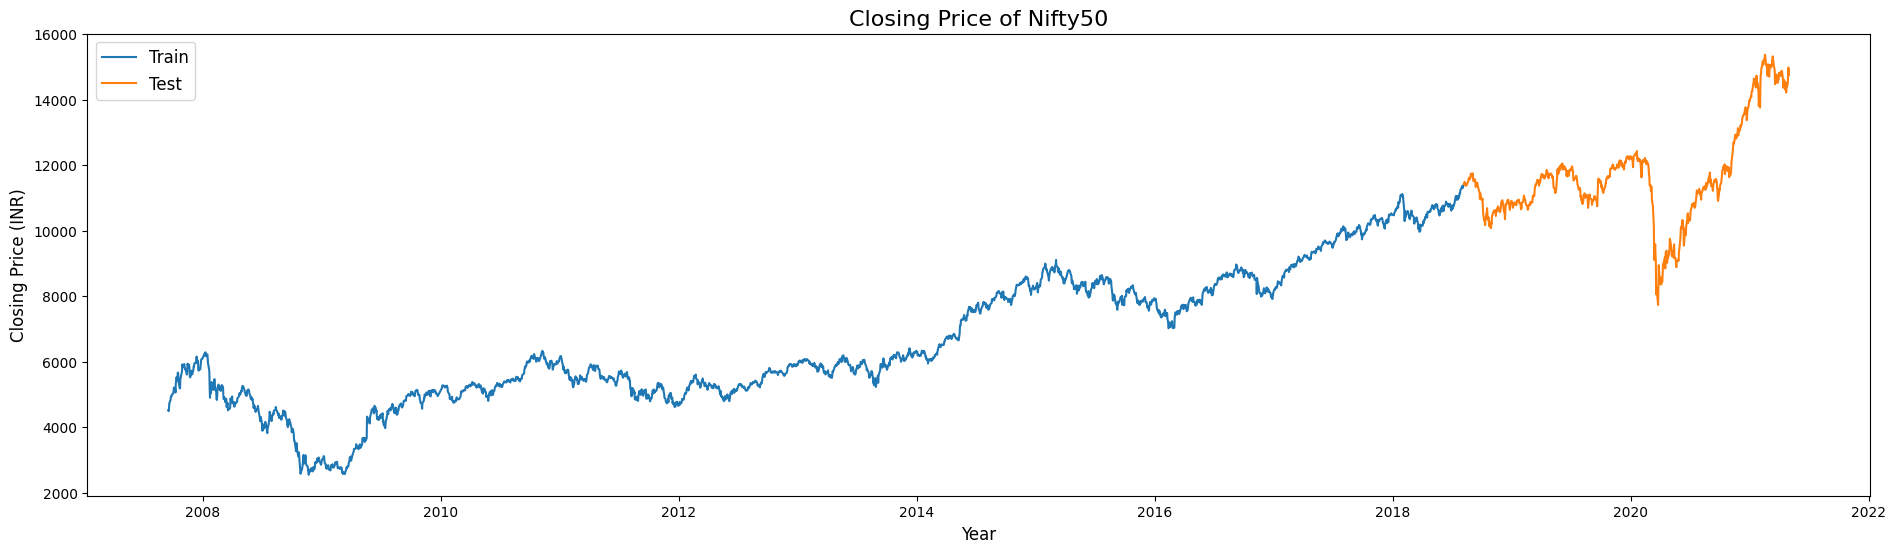

In [8]:
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df_train[feature], label='Train')
ax.plot(df_test[feature], label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Closing Price (INR)', fontsize=12)
ax.set_title('Closing Price of Nifty50', fontsize=16)
ax.legend(fontsize=12)

This code creates a line chart using Matplotlib to visualize the training and testing data for the "Open" column of the df DataFrame. Here's what each line does:

fig, ax = plt.subplots(figsize=(23, 6)): This creates a new figure and axes for the plot, with a width of 23 inches and a height of 6 inches. The fig variable stores the figure object, while the ax variable stores the axes object.
ax.plot(df_train[feature], label='Train'): This plots the "Open" column of the df_train DataFrame on the ax axes object as a line chart. The label parameter is set to "Train" to create a legend entry for the training data.
ax.plot(df_test[feature], label='Test'): This plots the "Open" column of the df_test DataFrame on the ax axes object as a line chart. The label parameter is set to "Test" to create a legend entry for the testing data.
ax.set_xlabel('Year', fontsize=12): This sets the label for the x-axis to "Year" with a font size of 12.
ax.set_ylabel('Closing Price (INR)', fontsize=12): This sets the label for the y-axis to "Closing Price (INR)" with a font size of 12.
ax.set_title('Closing Price of Nifty50', fontsize=16): This sets the title of the plot to "Closing Price of Nifty50" with a font size of 16.
ax.legend(fontsize=12): This adds a legend to the plot with font size of 12. The legend entries are automatically generated from the label parameters passed to the plot() method calls.

## Data Preprocessing

In [9]:
train = np.array(df_train[feature]).reshape(-1, 1)
test  = np.array(df_test [feature]).reshape(-1, 1)

This code converts the "Open" column of the df_train and df_test DataFrames into NumPy arrays and reshapes them into 2D arrays with a single column. Here's what each line does:

train = np.array(df_train[feature]): This converts the "Open" column of the df_train DataFrame into a NumPy array using the np.array() function and assigns it to the train variable.
train = train.reshape(-1, 1): This reshapes the train array into a 2D array with a single column and as many rows as necessary. The -1 parameter in the reshape() method is used to indicate that the number of rows should be automatically determined based on the size of the original array.
test = np.array(df_test[feature]): This converts the "Open" column of the df_test DataFrame into a NumPy array using the np.array() function and assigns it to the test variable.
test = test.reshape(-1, 1): This reshapes the test array into a 2D array with a single column and as many rows as necessary. The -1 parameter in the reshape() method is used to indicate that the number of rows should be automatically determined based on the size of the original array.

### Imputation

* Needed if null values present

In [10]:
print(f'Null value count:\n{df.isnull().sum()}')

Null value count:
Open     0
High     0
Low      0
Close    0
dtype: int64


This code prints the number of null values in each column of the df DataFrame using the isnull() and sum() methods. Here's what this line does:

print(f'Null value count:\n{df.isnull().sum()}'): This prints a formatted string to the console that displays the number of null values in each column of the df DataFrame. The isnull() method is used to generate a Boolean mask indicating which elements of the DataFrame are null, and the sum() method is used to count the number of null values in each column. The string contains a newline character \n to separate the column counts on separate lines.

### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)

train_sc = scaler.transform(train)
test_sc  = scaler.transform(test )

print(f'Scaled Training Set Example:', train_sc[0])
print(f'Scaled Testing  Set Example:', test_sc [0])

Scaled Training Set Example: [0.22206966]
Scaled Testing  Set Example: [1.00244695]


This code uses the MinMaxScaler() class from the scikit-learn library to scale the "Open" values in the train and test arrays to a range between 0 and 1. Here's what each line does:

from sklearn.preprocessing import MinMaxScaler: This imports the MinMaxScaler() class from the scikit-learn library. This class is used to scale the feature values to a specified range.
scaler = MinMaxScaler(feature_range=(0, 1)): This creates a MinMaxScaler object called scaler that will scale the feature values to a range between 0 and 1.
scaler.fit(train): This fits the scaler object to the training data in the train array. This computes the minimum and maximum values of the feature values in the training data, which will be used to scale the feature values.
train_sc = scaler.transform(train): This scales the feature values in the train array using the transform() method of the scaler object. The resulting scaled feature values are assigned to the train_sc variable.
test_sc = scaler.transform(test): This scales the feature values in the test array using the transform() method of the scaler object. The resulting scaled feature values are assigned to the test_sc variable.
print(f'Scaled Training Set Example:', train_sc[0]): This prints the first example in the train_sc array to the console to verify that the scaling has been performed correctly.
print(f'Scaled Testing Set Example:', test_sc[0]): This prints the first example in the test_sc array to the console to verify that the scaling has been performed correctly.

In [12]:
def to_time_windows(data, window_len):
    windows = []
    for i in range(len(data) - window_len):
        windows.append(data[i:i+window_len])
    return np.array(windows)

X_train_sc = to_time_windows(train_sc, window_len)
X_test_sc  = to_time_windows(test_sc , window_len)

y_train_sc = train_sc[window_len:]
y_test_sc  = test_sc [window_len:]

y_train = scaler.inverse_transform(y_train_sc)
y_test  = scaler.inverse_transform(y_test_sc)

This code defines a function to_time_windows() that converts a 1D array of time series data into a 2D array of overlapping time windows. It also uses this function to generate the input and output arrays for the machine learning model. Here's what each line does:

def to_time_windows(data, window_len):: This defines a function called to_time_windows() that takes two arguments: data, which is a 1D array of time series data, and window_len, which is the length of the time windows to generate.
windows = []: This creates an empty list called windows that will store the time windows.
for i in range(len(data) - window_len):: This loops through the indices of the data array up to len(data) - window_len, which ensures that there is enough data to generate a complete time window of length window_len.
windows.append(data[i:i+window_len]): This appends a slice of the data array starting at index i and ending at index i+window_len to the windows list. This slice represents a time window of length window_len.
return np.array(windows): This returns the windows list as a NumPy array.
X_train_sc = to_time_windows(train_sc, window_len): This generates a 2D array of input features for the training data by calling the to_time_windows() function on the train_sc array with a window length of window_len. The resulting array is assigned to the X_train_sc variable.
X_test_sc = to_time_windows(test_sc, window_len): This generates a 2D array of input features for the testing data by calling the to_time_windows() function on the test_sc array with a window length of window_len. The resulting array is assigned to the X_test_sc variable.
y_train_sc = train_sc[window_len:]: This generates a 1D array of output values for the training data by taking a slice of the train_sc array starting at index window_len. The resulting array represents the scaled output values that correspond to the input features in X_train_sc, and is assigned to the y_train_sc variable.
y_test_sc = test_sc[window_len:]: This generates a 1D array of output values for the testing data by taking a slice of the test_sc array starting at index window_len. The resulting array represents the scaled output values that correspond to the input features in X_test_sc, and is assigned to the y_test_sc variable.
y_train = scaler.inverse_transform(y_train_sc): This unscales the output values for the training data by calling the inverse_transform() method of the scaler object on the y_train_sc array. The resulting array represents the actual output values that correspond to the input features in X_train_sc, and is assigned to the y_train variable.
y_test = scaler.inverse_transform(y_test_sc): This unscales the output values for the testing data by calling the inverse_transform() method of the scaler object on the y_test_sc array. The resulting array represents the actual output values that correspond to the input features in X_test_sc, and is assigned to the y_test variable.

## Building the Recurrent Neural Network

### Setup Keras

In [21]:
!pip install keras

In [23]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'tensorflow'

This is a Python script that imports the TensorFlow library and sets the environment variable 'TF_CPP_MIN_LOG_LEVEL' to '2', which suppresses warnings related to TensorFlow compilation.

It then defines a sequential model using the Keras API from TensorFlow, which is a high-level API that allows for easy and efficient building of deep learning models.

The model consists of a sequence of layers, starting with a dense layer with a ReLU activation function, followed by a dropout layer, and finally an LSTM (long short-term memory) layer.

The dense layer performs a linear transformation of the input data and applies a non-linear activation function to produce the output. The dropout layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting. The LSTM layer is a type of recurrent neural network layer that is particularly effective for processing sequential data, such as time series data or natural language text.

### Initialising the RNN

In [ ]:
def build_model(data, window_len):
    model = Sequential()
    
    # Layer 1, shape = (window length, no of features)
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_len, len(data[0][0]))))
    model.add(Dropout(0.2))
    
    # Layer 2
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    # Output Layer
    model.add(Dense(units=1))
    model.add(Activation('relu'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    display(model.summary())
    return model

model = build_model(X_train_sc, window_len)

This is a Python function that builds a deep learning model using the Keras API from TensorFlow. The model takes in a 3-dimensional input tensor data and a window_len parameter, which determines the length of the input sequence.

The function first creates an instance of the Sequential class, which allows us to define a sequence of layers for the model. Then, the function adds the first LSTM layer with 50 units, which is a type of recurrent neural network layer that is particularly effective for processing sequential data.

The return_sequences parameter is set to True because we want the LSTM layer to return a sequence of outputs instead of just the final output. The input_shape parameter is set to (window_len, len(data[0][0])), which specifies the shape of the input tensor.

After the first LSTM layer, the function adds a dropout layer with a dropout rate of 0.2. The Dropout layer randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

Next, the function adds a second LSTM layer with 50 units and another dropout layer with a dropout rate of 0.2.

Finally, the function adds an output layer with a single unit and a ReLU activation function, which is a common choice for regression problems.

The compile method is then called to specify the optimizer and loss function for the model. In this case, the optimizer is set to 'adam', which is an algorithm for gradient-based optimization of stochastic objective functions. The loss function is set to 'mean_squared_error', which is a common choice for regression problems.

The display function is used to display a summary of the model architecture in the console, which includes the number of trainable parameters and the shape of each layer.

The function returns the built model instance. The X_train_sc and window_len arguments are used to build the model and assigned to the variable model.

### Fitting the RNN to training set

In [ ]:
model.fit(X_train_sc, y_train_sc, epochs=100, batch_size=64)

This is a line of code that trains the deep learning model on the training data X_train_sc and y_train_sc.

The fit method is a built-in function in Keras that trains the model for a fixed number of epochs, which is set to 100 in this case. An epoch is one iteration over the entire training dataset.

The batch_size parameter specifies the number of samples that the model should use for each update of the model weights during training. The batch size is set to 64, which means that the model weights will be updated after processing 64 samples.

During training, the model uses backpropagation to compute the gradients of the loss function with respect to the model weights, and the optimizer updates the weights to minimize the loss.

At the end of each epoch, the training loss is printed to the console, which gives an indication of how well the model is learning to predict the output y_train_sc given the input X_train_sc. The goal of training is to minimize the loss function over the training data, which will hopefully lead to good generalization performance on new, unseen data.

## Testing the model

In [ ]:
y_train_pred = scaler.inverse_transform(model.predict(X_train_sc))
y_test_pred  = scaler.inverse_transform(model.predict(X_test_sc ))

This is a code snippet that uses the trained model to make predictions on the training and test data, and then inversely scales the predicted values to their original scales using the inverse_transform method of a scaler object.

Assuming that scaler is a MinMaxScaler object that was used to normalize the input and output data before training, the inverse_transform method will rescale the data to its original range.

The predict method of the trained model is used to generate the predicted values for both the training and test data. The predicted values are then stored in the variables y_train_pred and y_test_pred.

Finally, the inverse_transform method is called on each of these variables to obtain the predicted values in their original scales. This allows us to compare the predicted values with the actual values and evaluate the performance of the model on the test set.

### Mean Error

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

train_error = mean_squared_error(y_train_pred, y_train, squared=False)
test_error  = mean_squared_error(y_test_pred , y_test , squared=False)

print(f'Mean Training Error:', round(train_error, 2))
print(f'Mean Testing  Error:', round(test_error , 2))

print(f'Train Accuracy: {round(100*r2_score(y_train_pred , y_train), 2)}%')
print(f'Test  Accuracy: {round(100*r2_score(y_test_pred  , y_test ), 2)}%')

The mean_squared_error function from the sklearn.metrics module is used to calculate the RMSE between the predicted and actual values for both the training and test datasets. The RMSE is a measure of how much the predicted values deviate from the actual values, on average, in the same units as the output variable. Lower RMSE values indicate better model performance.

y_train_pred and y_test_pred are the predicted values for the training and test datasets, respectively, obtained by running the model on the input data using the predict method.
y_train and y_test are the actual values for the training and test datasets, respectively.
The squared=False parameter is passed to the function to return the RMSE instead of the MSE.

The round function is used to round the RMSE values to two decimal places.
The f string syntax is used to embed the RMSE values in the printed string.
Next, the R-squared (R2) metric is calculated to measure how much of the variability in the output variable can be explained by the model. The r2_score function from the sklearn.metrics module is used to compute the R2 value for the predicted and actual values for both the training and test datasets.

y_train_pred and y_test_pred are the predicted values for the training and test datasets, respectively, obtained by running the model on the input data using the predict method.
y_train and y_test are the actual values for the training and test datasets, respectively.

The round function is used to round the R2 values to two decimal places.
The f string syntax is used to embed the R2 values in the printed string and format them as percentages.
Higher R2 values indicate better model performance. An R2 value of 1.0 indicates that the model perfectly fits the data, while a value of 0 indicates that the model does no better than predicting the mean of the output variable. Negative R2 values indicate that the model performs worse than predicting the mean.

Overall, the MSE and R2 values provide a quantitative assessment of the model's performance on the training and test datasets. By comparing the metrics across different models or hyperparameters, one can choose the best performing model for their task.

## Plotting Prediction vs Reality

### Train Data

In [ ]:
fig, ax = plt.subplots(figsize=(22, 6))

ax.plot(df_train[feature][window_len:].index, y_train, label='Reality')
ax.plot(df_train[feature][window_len:].index, y_train_pred, label='Prediction')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Bitcoin Price (USD)', fontsize=12)
ax.set_title('Reality vs Prediction - Closing Price of Bitcoin Train Data', fontsize=16)
ax.legend(fontsize=12)

This code plots the actual and predicted values of the training set for the machine learning model. Here's what each line does:

fig, ax = plt.subplots(figsize=(22, 6)): This creates a new figure with a size of 22 inches by 6 inches and returns a fig object and a ax object.
ax.plot(df_train[feature][window_len:].index, y_train, label='Reality'): This plots the actual values of the training set on the ax object. The df_train[feature][window_len:].index expression selects the index values of the training data starting at the window_len index, and the y_train array contains the corresponding actual values. The label parameter is set to "Reality" to identify the line in the legend.
ax.plot(df_train[feature][window_len:].index, y_train_pred, label='Prediction'): This plots the predicted values of the training set on the ax object. The df_train[feature][window_len:].index expression selects the index values of the training data starting at the window_len index, and the y_train_pred array contains the corresponding predicted values. The label parameter is set to "Prediction" to identify the line in the legend.
ax.set_xlabel('Year', fontsize=12): This sets the x-axis label of the plot to "Year" with a font size of 12.
ax.set_ylabel('Bitcoin Price (USD)', fontsize=12): This sets the y-axis label of the plot to "Bitcoin Price (USD)" with a font size of 12.
ax.set_title('Reality vs Prediction - Closing Price of Bitcoin Train Data', fontsize=16): This sets the title of the plot to "Reality vs Prediction - Closing Price of Bitcoin Train Data" with a font size of 16.
ax.legend(fontsize=12): This adds a legend to the plot with a font size of 12. The legend identifies the "Reality" and "Prediction" lines.

### Test Data

In [ ]:
fig, ax = plt.subplots(figsize=(22, 6))


ax.plot(df_test[feature][window_len:].index, y_test, label='Reality')
ax.plot(df_test[feature][window_len:].index, y_test_pred, label='Prediction')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Bitcoin Price (USD)', fontsize=12)
ax.set_title('Reality vs Prediction - Closing Price of Bitcoin Test Data', fontsize=16)
ax.legend(fontsize=12)

This code plots the actual and predicted values of the testing set for the machine learning model. Here's what each line does:

fig, ax = plt.subplots(figsize=(22, 6)): This creates a new figure with a size of 22 inches by 6 inches and returns a fig object and a ax object.
ax.plot(df_test[feature][window_len:].index, y_test, label='Reality'): This plots the actual values of the testing set on the ax object. The df_test[feature][window_len:].index expression selects the index values of the testing data starting at the window_len index, and the y_test array contains the corresponding actual values. The label parameter is set to "Reality" to identify the line in the legend.
ax.plot(df_test[feature][window_len:].index, y_test_pred, label='Prediction'): This plots the predicted values of the testing set on the ax object. The df_test[feature][window_len:].index expression selects the index values of the testing data starting at the window_len index, and the y_test_pred array contains the corresponding predicted values. The label parameter is set to "Prediction" to identify the line in the legend.
ax.set_xlabel('Year', fontsize=12): This sets the x-axis label of the plot to "Year" with a font size of 12.
ax.set_ylabel('Bitcoin Price (USD)', fontsize=12): This sets the y-axis label of the plot to "Bitcoin Price (USD)" with a font size of 12.
ax.set_title('Reality vs Prediction - Closing Price of Bitcoin Test Data', fontsize=16): This sets the title of the plot to "Reality vs Prediction - Closing Price of Bitcoin Test Data" with a font size of 16.
ax.legend(fontsize=12): This adds a legend to the plot with a font size of 12. The legend identifies the "Reality" and "Prediction" lines.